# The Kolmogorov-Smirnov Test - Lab

## Introduction
In the previous lesson, we saw that the Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples. In this lab, we shall see how to perform this test in python. 

## Objectives

You will be able to:
* Perform 1 sample and 2 sample KS tests in Python and Scipy
* Compare the KS test to visual approaches for checking normality assumptions
* Plot the CDF and ECDF to visualize parametric and empirical cumulative distribution functions

## Generate Data

### Let's import the necessary libraries and generate some data 

In [10]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Create the normal random variables with mean 0, and sd 3
x_10 = stats.norm.rvs(loc=0, scale=3, size=10)
x_50 = stats.norm.rvs(loc=0, scale=3, size=50)
x_100 = stats.norm.rvs(loc=0, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=0, scale=3, size=1000)

### Plot Histograms and QQ plots of above datasets and comment on the output 

- How good are these techniques for checking normality assumptions?
- Compare both these techniques and identify their limitations/benefits etc. 


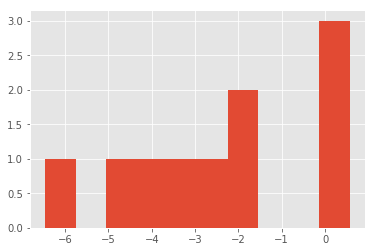

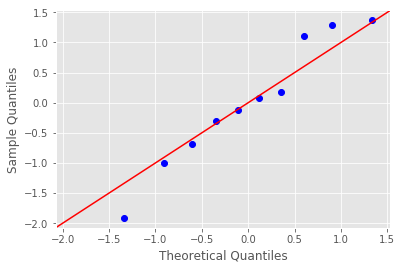

In [6]:
plt.hist(x_10)
sm.graphics.qqplot(data=x_10, dist=stats.norm, line='45', fit=True);

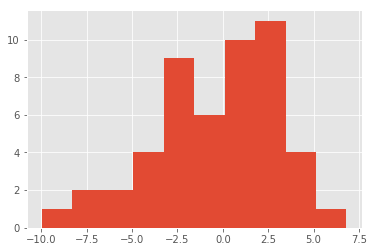

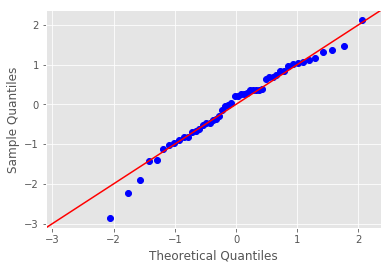

In [7]:
plt.hist(x_50)
sm.graphics.qqplot(data=x_50, dist=stats.norm, line='45', fit=True);

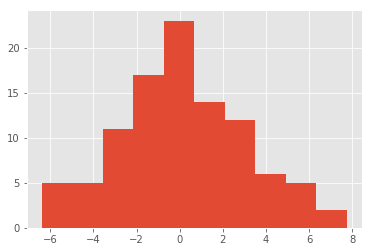

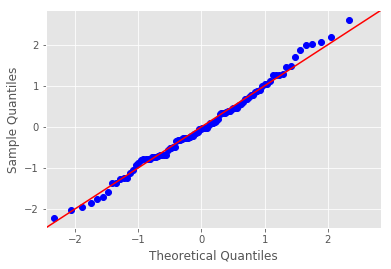

In [8]:
plt.hist(x_100)
sm.graphics.qqplot(data=x_100, dist=stats.norm, line='45', fit=True);

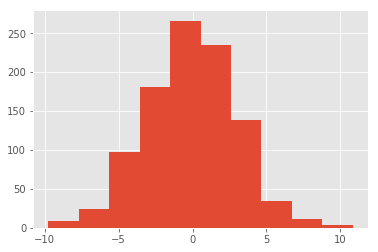

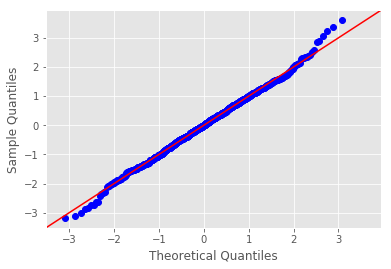

In [9]:
plt.hist(x_1000)
sm.graphics.qqplot(data=x_1000, dist=stats.norm, line='45', fit=True);

For the purpose of checking normality assumptions, these visual techniques are only as good as the sample size is large. Even with the largest sample, the number of bins used in the histogram can affect the perception of normality--and even if the histogram looks like a normal distribution, these plots alone can't tell us how close the distribution is to normal in any quantitative way. These techniques are useful for an initial check to identify distributions that are far from normal.

### Create a function to plot the normal CDF and ECDF for a given dataset
- Create a function ks_plot(data) to generate an empirical CDF from data
- Create a normal CDF using the same mean = 0 and sd = 3, having the same number of values as data

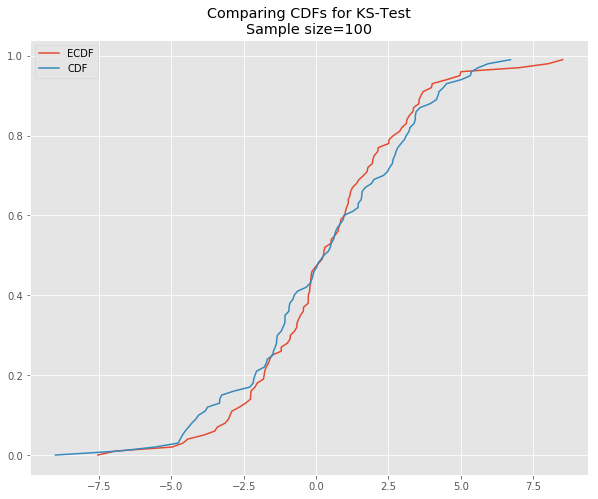

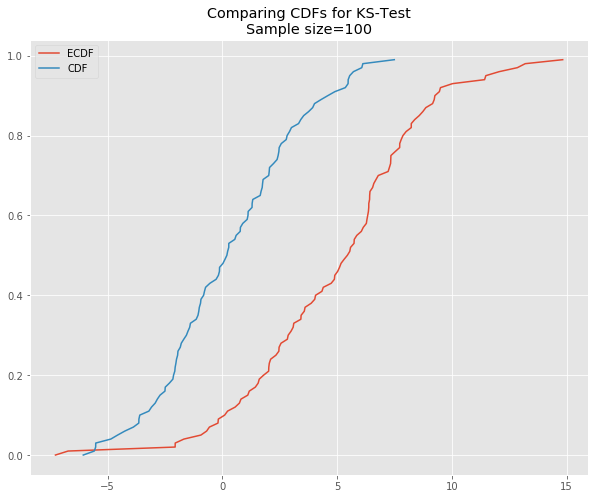

In [14]:
# You code here 

def ks_plot(data):
    n = len(data)
    data_sorted = np.sort(data)
    theo_dist = np.sort(stats.norm.rvs(loc=0, scale=3, size=n))
    plt.figure(figsize=(10,8))
    plt.plot(data_sorted, np.linspace(0, 1, n, endpoint=False), 
             label='ECDF')
    plt.plot(theo_dist, np.linspace(0, 1, n, endpoint=False), 
             label='CDF')
    plt.title('Comparing CDFs for KS-Test\nSample size={}'.format(n))
    plt.legend()
    plt.show();
    
    
    
# Uncomment below to run the test
ks_plot(stats.norm.rvs(loc=0, scale=3, size=100)) 
ks_plot(stats.norm.rvs(loc=5, scale=4, size=100))


This is awesome. The difference between the two CDFs in the second plot shows that the sample did not come from the distribution which we tried to compare it against. 

### Now you can run all the generated datasets through the function ks_plot and comment on the output.

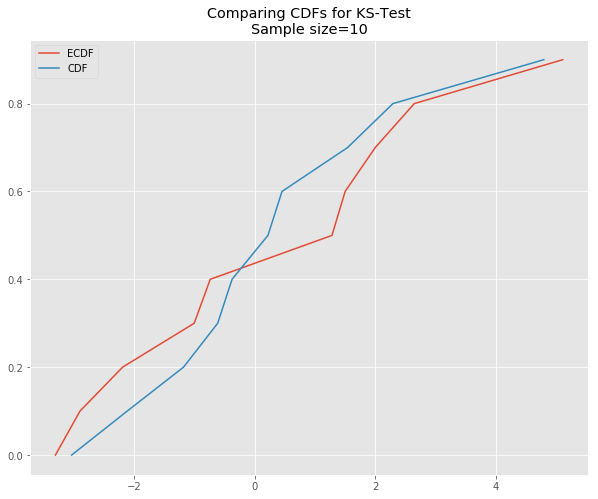

In [15]:
ks_plot(x_10)

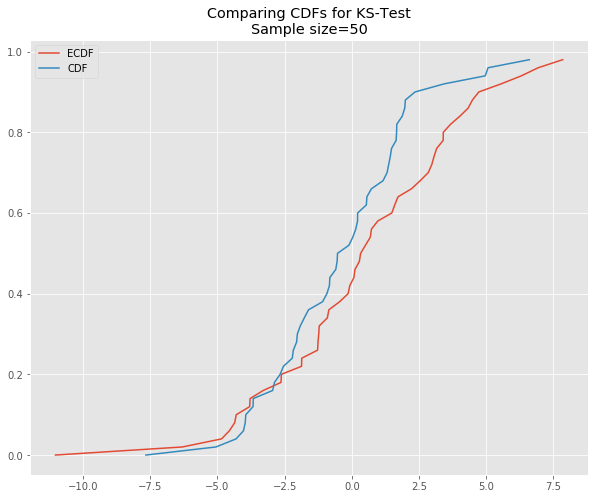

In [16]:
ks_plot(x_50)

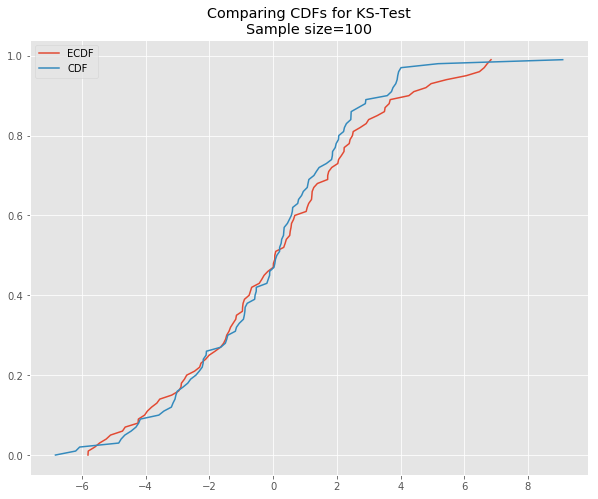

In [17]:
ks_plot(x_100)

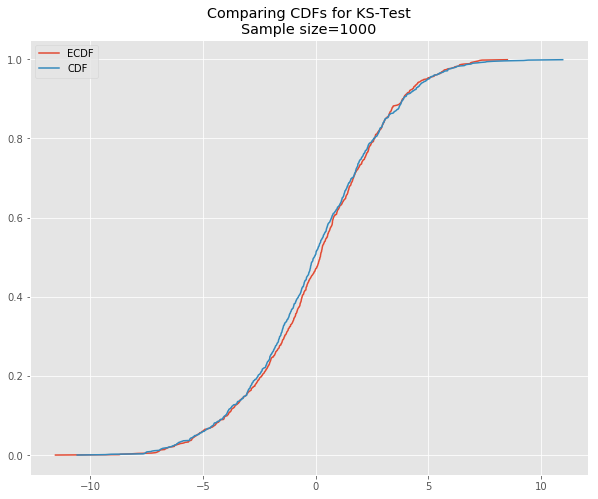

In [18]:
ks_plot(x_1000)

As sample size increases, we can see the ECDF move closer to the theoretical CDF until, at n=1000, they overlap almost perfectly. 


### KS test in SciPy

Let's run the Kolmogorov-Smirnov test, and use some statistics to get a final verdict on normality. It lets us test the hypothesis that the sample is a part of the standard t-distribution. In SciPy, we run this test using the method below:

```python
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')
```
Details on arguments being passed in can be viewed at this [link to the official doc.](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)


### Run the KS test for normality assumption using the datasets created earlier and comment on the output
- Perform the KS test against a normal distribution with mean = 0 and sd = 3
- If p < .05 we can reject the null hypothesis and conclude our sample distribution is not identical to a normal distribution.

In [21]:
# Perform KS test 
stats.kstest(x_10, 'norm', args=(0,3), N=len(x_10), 
            alternative='two-sided', mode='approx')

KstestResult(statistic=0.16536150602942468, pvalue=0.9473684798173145)

In [22]:
stats.kstest(x_50, 'norm', args=(0,3), N=len(x_50), 
            alternative='two-sided', mode='approx')

KstestResult(statistic=0.1285085548759437, pvalue=0.35242373742879396)

In [23]:
stats.kstest(x_100, 'norm', args=(0,3), N=len(x_100), 
            alternative='two-sided', mode='approx')

KstestResult(statistic=0.03214059705101921, pvalue=0.9999492547981261)

In [24]:
stats.kstest(x_1000, 'norm', args=(0,3), N=len(x_1000), 
            alternative='two-sided', mode='approx')
# Your code here 

# KstestResult(statistic=0.1377823669421559, pvalue=0.9913389045954595)
# KstestResult(statistic=0.13970573965633104, pvalue=0.2587483380087914)
# KstestResult(statistic=0.0901015276393986, pvalue=0.37158535281797134)
# KstestResult(statistic=0.030748345486274697, pvalue=0.29574612286614443)

KstestResult(statistic=0.033106523798831056, pvalue=0.21848029969350646)

In each case, the p-value indicates that we fail to reject the null hypothesis. These are all normal distributions.


### Generate a uniform distribution and plot / calculate the ks test against a uniform as well as a normal distribution

In [25]:
# Try with a uniform distribution
x_uni = np.random.rand(1000)
print('x_uni v. normal:', stats.kstest(x_uni, 'norm', args=(0,3)))
print('x_uni v. uniform:', stats.kstest(x_uni, lambda x: x))
# KstestResult(statistic=0.023778383763166322, pvalue=0.6239045200710681)
# KstestResult(statistic=0.5000553288071681, pvalue=0.0)

x_uni v. normal: KstestResult(statistic=0.5000605773304947, pvalue=0.0)
x_uni v. uniform: KstestResult(statistic=0.028408207286717543, pvalue=0.3907148227964701)


`x_uni` is definitely not a normal distribution (`p_value = 0.0`), but we cannot reject the null hypothesis that it is a uniform distribution.


## 2 sample KS test
A two sample KS test is available in SciPy using following function
```python 
scipy.stats.ks_2samp(data1, data2)[source]
```

Let's generate some bi-modal data first for this test 

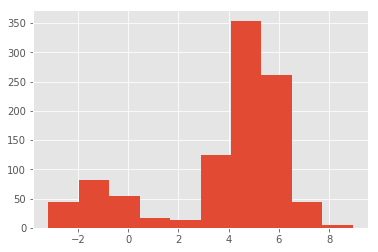

In [38]:
# Generate binomial data
N = 2000
x_1000_bi = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)), np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]
plt.hist(x_1000_bi);

In [39]:
x_1000_bi.shape

(1000, 1)

### Plot the CDFs for x_1000_bimodal and x_1000 and comment on the output 

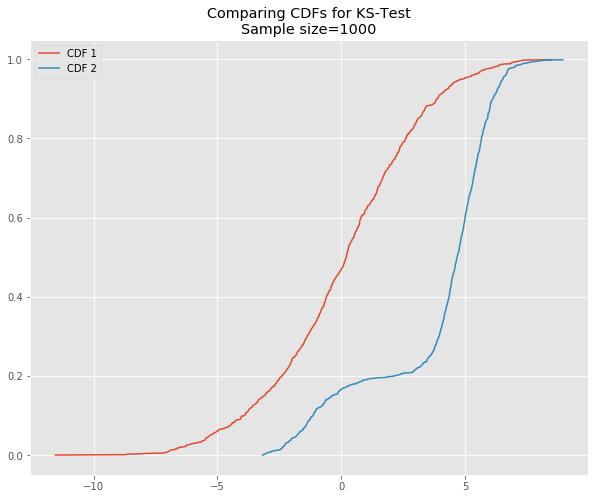

In [41]:

# Plot the CDFs
def ks_plot_2sample(data_1, data_2):
    '''
    Data entered must be the same size.
    '''
    n1 = len(data_1)
    n2 = len(data_2)
    shape_1 = data_1.shape
    shape_2 = data_2.shape
    if shape_1 == shape_2:
        data_1_sorted = np.sort(data_1)
        data_2_sorted = np.sort(data_2)
    
        plt.figure(figsize=(10,8))
        plt.plot(data_1_sorted, np.linspace(0, 1, n1, endpoint=False), 
                 label='CDF 1')
        plt.plot(data_2_sorted, np.linspace(0, 1, n2, endpoint=False), 
                 label='CDF 2')
        plt.title('Comparing CDFs for KS-Test\nSample size={}'.format(n1))
        plt.legend()
        plt.show();
    else:
        print('Samples are not the same shape.')
        print('Sample 1 shape:', shape_1)
        print('Sample 2 shape:', shape_2)
    

# Uncomment below to run
ks_plot_2sample(x_1000, x_1000_bi[:,0])


`x_1000_bi` is clearly bimodal in this graph; the first hump in the histogram contains about 20% (cumulatively) of the data, while the rest of the data is in the second hump. If we were to calculate the KS statistic on these samples (D), it would occur somewhere around x=2.5.

### Run the two-sample KS test on x_1000 and x_1000_bi and comment on the results

In [42]:
# Your code here
stats.ks_2samp(x_1000, x_1000_bi[:,0])
# Ks_2sampResult(statistic=0.633, pvalue=4.814801487740621e-118)

Ks_2sampResult(statistic=0.647, pvalue=2.914121526621081e-184)

The extremely low p-value indicates that we should reject the null hypothesis; these two samples are definitely different in their distributions.

## Summary

In this lesson, we saw how to check for normality (and other distributions) using one sample and two sample ks-tests. You are encouraged to use this test for all the upcoming algorithms and techniques that require a normality assumption. We saw that we can actually make assumptions for different distributions by providing the correct CDF function into Scipy KS test functions. 